# Decision Tree (의사결정 나무)

의사결정나무는 분류나무(classification tree)와 회귀나무(regression tree)로 구분된다.

분류나무의 경우 상위노드에서 가지분할을 수행할 때, 분류(기준)변수와 분류 기준값의 선택 방법으로 카이제곱 통계량(Chi-square statistic)의 $p$-값, 지니 지수(Gini index), 엔트로피 지수(entropy index) 등이 사용된다.

선택된 기준에 의해 분할이 일어날 때, 카이제곱통계량의 $p$-값은 그 값이 작을수록 자식노드간의 이질성이 큼을 나타내며, 자식노드에서의 지니 지수나 엔트로피 지수는 그 값이 클수록 자식노드 내의 이질성이 큼을 의미한다. 

따라서 이 값들이 가장 작아지는 방향으로 가지분할을 수행하게 된다.

### Entropy

불순도(Impurity)란 해당 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지를 의미한다.

엔트로피(Entropy)는 불순도(Impurity)를 수치적으로 나타낸 척도이다.

$ 0 <= E <= 1$

![007-5](https://user-images.githubusercontent.com/63298243/118453947-c073e280-b732-11eb-8cb6-dde7acb7f87d.png)

+ p<sub>i</sub> = 한 영역 안에 존재하는 데이터 가운데 범주 i에 속하는 데이터의 비율

아래의 그림에서 Entropy의 값이 클수록 이질적이며 순수도(purity)가 낮다고 할 수 있다.

![007-9](https://user-images.githubusercontent.com/63298243/118514821-bde3ae00-b76f-11eb-93b8-999f9849b75e.jpg)


# Information gain
Information gain = entropy(parent) - [weighted average] entropy(children)

정보 획득을 최대화하는 방향으로 학습이 진행된다.

반대로 말하면 Entropy가 작아지는 방향으로 진행된다.

어느 feature의 어느 분기점에서 정보 획득이 최대화되는지 판단을 해서 분기가 진행된다.

![007-6](https://user-images.githubusercontent.com/63298243/118457569-d8e4fc80-b734-11eb-9250-11afca6c7859.JPG)

![007-7](https://user-images.githubusercontent.com/63298243/118457572-da162980-b734-11eb-83a1-a9488ea3b1e7.JPG)

![007-8](https://user-images.githubusercontent.com/63298243/118457580-daaec000-b734-11eb-90ea-659449d6bad3.JPG)

### Pruning

가지분할(split)은 나무의 가지를 생성하는 과정을, 

가지치기(pruning)는 생성된 가지를 잘라내어 모형을 단순화하는 과정을 말한다

<img width="631" alt="007-3" src="https://user-images.githubusercontent.com/63298243/118453089-c917e900-b731-11eb-9f43-f009f088710d.png">

<img width="814" alt="007-4" src="https://user-images.githubusercontent.com/63298243/125481434-67472353-589f-4195-b614-4a5acb7a9ef6.png">

## Import library

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Load data
유방암 진단 데이터셋

1.샘플 코드 번호 id 번호  
2. 덩어리 두께 1-10  
3. 셀 크기의 균일성 1-10  
4. 세포 모양의 균일성 1-10  
5. 한계 접착 1-10  
6. 단일 상피 세포 크기 1-10   
7. 드러난 핵세포량 1-10  
8. 부드러운 염색질 1-10  
9. 정상 핵소체 1-10  
10. 유사 분열 1-10  

클래스 분포:  
양성: 458(65.5%)  
악성: 241(34.5%)

[직접 다운로드](https://www.cc.gatech.edu/projects/disl/VISTA/breast.html)

In [2]:
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'

In [3]:
df = pd.read_csv(uci_path, header=None)

In [4]:
df.columns = ['id','clump','cell_size','cell_shape', 'adhesion','epithlial', 'bare_nuclei','chromatin','normal_nucleoli', 'mitoses', 'class'] 

## EDA

null(nan) 데이터 처리와 object를 int형으로 변환해야 함

In [5]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clump            699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epithlial        699 non-null    int64 
 6   bare_nuclei      699 non-null    object
 7   chromatin        699 non-null    int64 
 8   normal_nucleoli  699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
df.isna().sum()

id                 0
clump              0
cell_size          0
cell_shape         0
adhesion           0
epithlial          0
bare_nuclei        0
chromatin          0
normal_nucleoli    0
mitoses            0
class              0
dtype: int64

In [9]:
df['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [10]:
df['bare_nuclei'].replace('?', np.nan, inplace=True)
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True)
df['bare_nuclei'] = df['bare_nuclei'].astype('int64')

<AxesSubplot:>

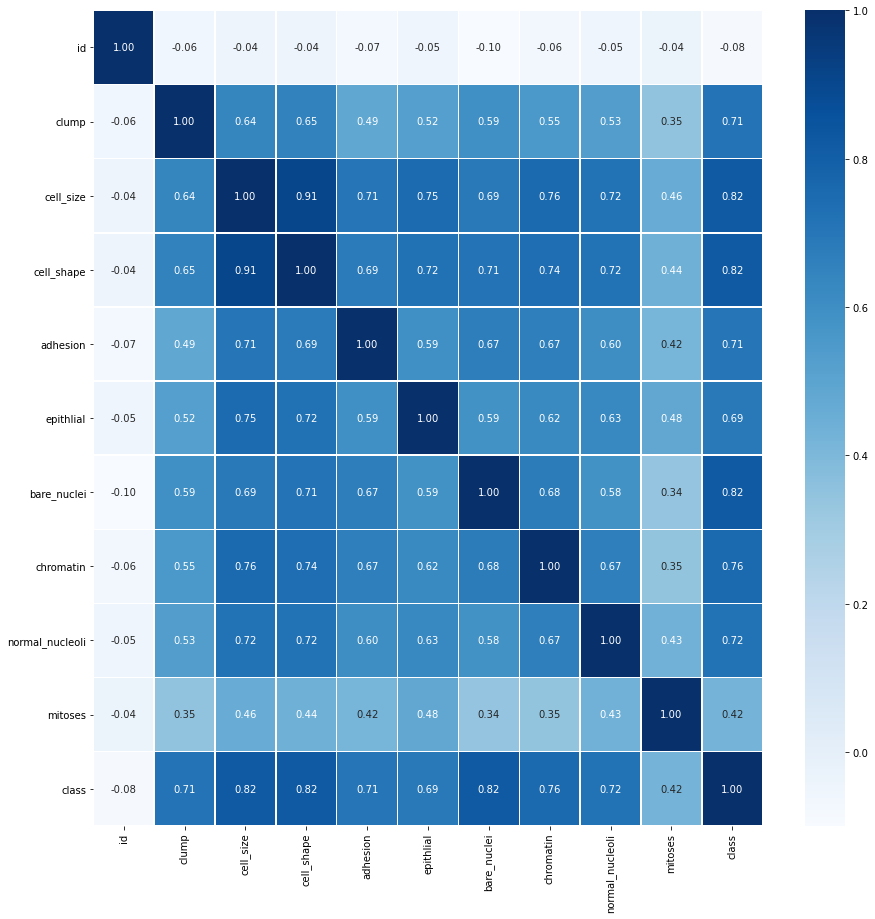

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths = .5, cmap='Blues')

## Modeling

정확도가 98% 이상이 되도록 만들어주세요 !!!

종속변수는 'class'입니다.

모델은 아래를 참고하여 쓰면 됩니다.
- DecisionTreeClassifier(criterion='entropy', max_depth=3)

#### 파라미터 설명
criterion : 분류척도

max_depth : 가지치는 최대 깊이

    - max_depth가 커질수록 모델 정확도는 높아질 수 있으나, Overfitting, 즉 실제 데이터에 대해서는 정확도가 떨어질 수 있다.

In [65]:
y=df['class']                      #종속 변수 Y
X=df.drop(['class','id'], axis=1)

In [66]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [68]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [69]:
dt_model.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [70]:
r_square = dt_model.score(X_test, y_test)
print(r_square*100,"%",sep=" ")

97.07317073170731 %
